Again, let's start with loading the most important modules and setting some options.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
%matplotlib inline
sns.set_style("ticks")

# Geo Basics

### Geodata

Geodata is information about geographic objects (**features**) and their precise (geo)spatial location. The geometric shape and associated attributes of geographic objects are modeled together either in a **vector data model** or **raster data model**.

**Raster**: 
- Built up of regularly arranged and equally sized pixels (**grid**).
- The (color) values of the individual pixels describe the geographical area associated with the pixel.
- The area covered by a single pixel determines the spatial resolution of the grid (e.g. 1x1km).
- Are mainly used for continuous geographic phenomena - especially for physical phenomena (e.g. elevation).

**Vector**: 
- Geographic features are modeled as **points**, **lines**, and **polygons**.
- Points can be precisely defined by a pair of **coordinates** (x, y; latitude, longitude).
- Lines and polygons consist of interconnected (ordered) points.
- Geometries of geographic features can be defined exactly in this way.
- Used mainly for discrete geographic phenomena - e.g. administrative boundaries, buildings, etc.

<img src="../misc/geodata_models.png" width="600"> 

### Layer concept

In **Geographic Information Systems** (**GIS**), geodata is structured using the layer principle. Each layer represents a distinct geographic phenomenon and several layers together represent a more or less abstracted version of the real world. 

<img src="../misc/layer.jpg" width="300"> 

### Coordinate (reference) systems

- System used to indicate the position of a point in space.
- Serves for the localization of geographical objects.
- The position is indicated by coordinates (X,Y).
- Approximately 4,400 different coordinate reference systems (**CRS**).
- **EPSG** system with unique codes for each CRS.
- Coordinate transformation (conversion) between different coordinate systems is possible.
- **Geographic (spherical) coordinates** vs. **projected (2D) coordinates**.
- Representation and analysis is done in the projected CRS.

<img src="../misc/crs.png" width="250"> 

**Geographic coordinate systems**:
- Spherical coordinates.
- Longitude and latitude.
- Specified in degree or decimal format.
- Coordinates are given by default as geographic coordinates in decimal format (e.g. ISTARI.AI HQ: 49.47357504318401, 8.475272386708715).
- Current standard is the worldwide valid **WGS 84** system (**EPSG: 4326**).

<img src="../misc/globe.gif" width="350"> 

**Projected coordinate systems**:
- Curved surface of the earth is projected onto a plane
- The mathematical operation of projection leads to distortions in Distance, Area, Shape, and/or Direction.
- Many projections work only in certain regions.
- **EPSG: 3857 "Web Mercator"** standard for Web Map Services (WMS) like Google Maps and OpenStreetMap.

![SegmentLocal](../misc/animation_projection.gif)

# 4. GeoPandas

We will use GeoPandas to create maps. GeoPandas extends the dataypes used by Pandas to allow for spatial operations on geometric types. Let's install GeoPandas. This can be a sometimes a littel bit tricky. I recommend to first install fiona (a dependency of GeoPandas):

1. ```conda install -c conda-forge fiona```

then try to install geopandas:

2. ```pip install geopandas```

If this does not work, try to run the following commands:
- ```pip install wheel```
- ```pip install pipwin```
- ```pipwin install shapely```
- ```pipwin install gdal```
- ```pipwin install fiona```
- ```pipwin install pyproj```
- ```pipwin install six```
- ```pipwin install rtree```
- ```pipwin install geopandas```
- ```pipwin install descartes```
- ```pip install mapclassify```

After restarting the kernel (use the circle arrow above) we should be able to import geopandas:

In [2]:
import geopandas as gpd

Now we can use geopandas to read geodata (files that contain tabular data and geometry). The most common geodata filetypes are:
- **ESRI shapefile**: ESRI is "the Microsoft of Geographic Information Systems" and shapefiles are their standard file format. A shapefile consists of several files (3 to 5) but you want to work with the .shp file which contains the geometry.
- **Google KML/KMZ**: .kml and .kmz files are used by Google Maps and Google Earth.
- **GeoJSON**: A open data format for geodata based on the popular JSON format. 

Let's read in a GeoJSON file I prepared for us. You can see that it looks very much like a normal dataframe after loading.

In [3]:
gpd.read_file("../data/world_map.json")

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,1,Admin-0 country,2,United States of America,US1,1,2,Country,United States of America,USA,0,United States of America,USA,0,United States of America,USA,0,United States,United States,USA,United States,None,U.S.A.,US,United States of America,None,None,None,United States of America,None,4,5,1,1,313973000,15094000.000,0,2010,0,1. Developed region: G7,1. High income: OECD,0,None,US,USA,840,840,US,USA,-99,USA,USA,-99,-99,North America,Americas,Northern America,North America,13,13,6,-99,1,USA.geojson,"MULTIPOLYGON (((-155.542 19.083, -155.688 18.9..."
1,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,0,Canada,CAN,0,Canada,CAN,0,Canada,Canada,CAN,Canada,None,Can.,CA,Canada,None,None,None,Canada,None,6,6,2,2,33487208,1300000.000,-99,2011,-99,1. Developed region: G7,1. High income: OECD,-99,None,CA,CAN,124,124,CA,CAN,-99,CAN,CAN,-99,-99,North America,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,"MULTIPOLYGON (((-63.664 46.550, -62.939 46.416..."
2,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,0,Belize,BLZ,0,Belize,BLZ,0,Belize,Belize,BLZ,Belize,None,Belize,BZ,Belize,None,None,None,Belize,None,1,4,5,7,307899,2536.000,-99,2010,-99,6. Developing region,4. Lower middle income,-99,None,BZ,BLZ,084,084,BZ,BLZ,-99,BLZ,BLZ,-99,-99,North America,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"POLYGON ((-89.143 17.808, -89.151 17.955, -89...."
3,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,0,The Bahamas,BHS,0,The Bahamas,BHS,0,Bahamas,Bahamas,BHS,Bahamas,None,Bhs.,BS,Commonwealth of the Bahamas,None,None,None,"Bahamas, The",None,1,1,2,5,309156,9093.000,-99,2010,-99,6. Developing region,2. High income: nonOECD,-99,None,BS,BHS,044,044,BS,BHS,-99,BHS,BHS,-99,-99,North America,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,"MULTIPOLYGON (((-77.535 23.760, -77.780 23.710..."
4,1,Admin-0 country,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,0,Costa Rica,CRI,0,Costa Rica,CRI,0,Costa Rica,Costa Rica,CRI,Costa Rica,None,C.R.,CR,Republic of Costa Rica,None,None,None,Costa Rica,None,3,2,4,2,4253877,48320.000,-99,2011,-99,5. Emerging region: G20,3. Upper middle income,-99,None,CR,CRI,188,188,CR,CRI,-99,CRI,CRI,-99,-99,North America,Americas,Central America,Latin America & Caribbean,10,10,4,-99,1,CRI.geojson,"POLYGON ((-82.966 8.225, -83.508 8.447, -83.71..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1,Admin-0 country,3,Poland,POL,0,2,Sovereign country,Poland,POL,0,Poland,POL,0,Poland,POL,0,Poland,Poland,POL,Poland,None,Pol.,PL,Republic of Poland,None,None,None,Poland,None,3,7,1,2,38482919,667900.000,-99,2011,-99,2. Developed region: nonG7,1. High income: OECD,-99,None,PL,POL,616,616,PL,POL,-99,POL,POL,-99,-99,Europe,Europe,Eastern Europe,Europe & Central Asia,6,6,4,-99,1,POL.geojson,"POLYGON ((15.017 51.107, 14.607 51.745, 14.685..."
171,1,Admin-0 country,3,Sweden,SWE,0,2,Sovereign country,Sweden,SWE,0,Sweden,SWE,0,Sweden,SWE,0,Sweden,Sweden,SWE,Sweden,None,Swe.,S,Kingdom of Sweden,None,None,None,Sweden,None,1,4,2,4,9059651,344300.000,-99,-99,-99,2. Developed region: nonG7,1. High income: OECD,-99,None,SE,SWE,752,752,SE,SWE,-99,SWE,SWE,-99,-9

Let's have a look at the datatypes of this dataframe. The interesting one is the last one. It is named "geometry" and has our new dataframe datatype ```geometry```.

In [4]:
world_map = gpd.read_file("../data/world_map.json")
world_map.dtypes

scalerank        int64
featurecla      object
labelrank        int64
sovereignt      object
sov_a3          object
adm0_dif         int64
level            int64
type            object
admin           object
adm0_a3         object
geou_dif         int64
geounit         object
gu_a3           object
su_dif           int64
subunit         object
su_a3           object
brk_diff         int64
name            object
name_long       object
brk_a3          object
brk_name        object
brk_group       object
abbrev          object
postal          object
formal_en       object
formal_fr       object
note_adm0       object
note_brk        object
name_sort       object
name_alt        object
mapcolor7        int64
mapcolor8        int64
mapcolor9        int64
mapcolor13       int64
pop_est          int64
gdp_md_est     float64
pop_year         int64
lastcensus       int64
gdp_year         int64
economy         object
income_grp      object
wikipedia        int64
fips_10         object
iso_a2     

Let's have a look at the "geometry" of a single observation. As you can see, it includes a ```POLYGON``` made up of coordinate pairs (longitude and latitude), which trace the border of the polygon. 

In [5]:
world_map.sample()["geometry"]

21    MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...
Name: geometry, dtype: geometry

The geometry stored in this column allows us to plot the dataframe as a map.

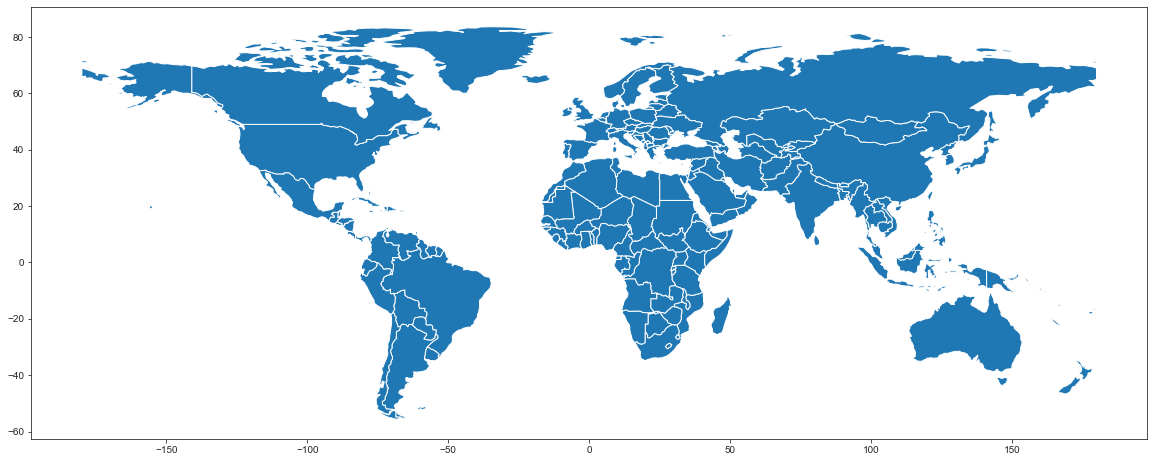

In [6]:
world_map.plot(figsize=(20,20))

If we want to plot a single observation from our geopandas dataframe (corresponding to a single country), we can simply filter that observation and plot it.

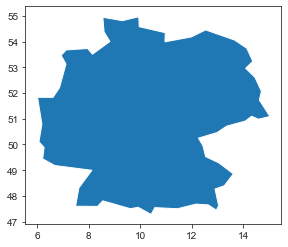

In [7]:
world_map[world_map["sovereignt"] == "Germany"].plot()

We can also select several observations and plot them.

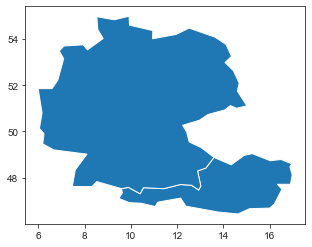

In [8]:
world_map[world_map["sovereignt"].isin(["Germany", "Austria"])].plot()

### Coordinate Reference Systems (CRS) and projections

We already learnt about CRS and that all geodata needs to have an associated CRS in order to be located on the earth's surface and displayed properly. We can easily check for a geopanda dataframe's associated CRS by using ```.crs```. 

In [11]:
world_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It makes sense that ```world_map```'s CRS is WGS 84 (EPSG code: 4326) given that it is geodata with global coverage. Maybe you already noticed that Germany looks somehow distorted and unfamiliar. This is because you are used to see maps of Germany in projected CRS that work well for central Europe. For Germany, UTM zone 32 (https://epsg.io/25832) is usually used (EPSG: 25832) and we can easily transfer our selection of ```world_map``` to this crs using ```to_crs(epsg="25832")```.

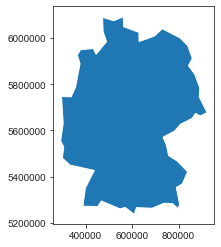

In [13]:
world_map[world_map["sovereignt"] == "Germany"].to_crs(epsg="25832").plot()

Note, however, that this CRS would not work globally.

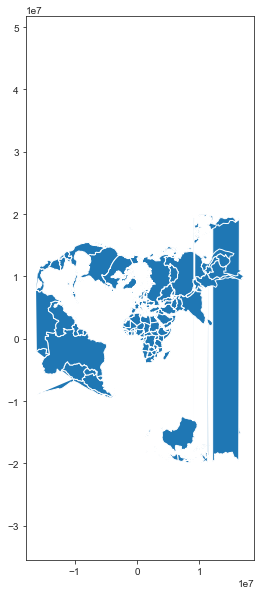

In [18]:
world_map.to_crs(epsg="25832").plot(figsize=(10,10))

### Choropleth maps

We can also pass a column to the ```plot()``` function in order to use it for the coloring of the countries (creating a so-called choropleth map https://en.wikipedia.org/wiki/Choropleth_map).

In [ ]:
world_map.plot(figsize=(20,20), column="pop_est")

The classes used to color the countries are not that informative yet, as most countries are in the lowest (i.e. darkest) class. We can change that by selecting a more appropriate choropleth classification scheme. Here are some commonly used ones:
- ```'NaturalBreaks'``` https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization
- ```'Quantiles'``` https://en.wikipedia.org/wiki/Quantile
- ```'Percentiles'``` https://en.wikipedia.org/wiki/Percentile
- ```'StdMean'``` https://en.wikipedia.org/wiki/Standard_deviation

We may also pass a ```k=``` parameter to define the number of classes we want to create using the defined scheme. We also want a legend for our map which we can achieve by passing ```legend=True```.

In [ ]:
world_map.plot(figsize=(20,20), column="pop_est", scheme="Quantiles", k=10, legend=True)

In the legend, we can see that the lowest value for population is "-99", which makes no sense. It seems like that the person who created this dataset used "-99" to mark missing values. Let's replace them.

In [ ]:
world_map["pop_est"] = world_map["pop_est"].replace({-99: np.nan})

Let's also create a new column containing the population in millions.

In [ ]:
world_map["pop_million"] = world_map["pop_est"] / 1000000

We can also pass some ```missing_kwds={}``` to tell geopandas how to handle missing data.

In [ ]:
world_map.plot(figsize=(20,20), column="pop_million", scheme="NaturalBreaks", k=5, legend=True, missing_kwds={'color': 'lightgrey', "label": "Missing"})

To make some proper maps, we usually want to use the matplotlib approach we learned about last week.

In [ ]:
from matplotlib import gridspec

# create one figure size 20,10
fig = plt.figure(figsize=(20,10))
# use the gridspec function to define 2 columns in this figure; set the width ratio to 3:1, meaning the first column will be 3 times the width of the second column
columns = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[3, 1])

# add a subplot to the first column of the figure
axis_0 = fig.add_subplot(columns[0])
# world population choropleth map
world_map.plot(column="pop_million", scheme="NaturalBreaks", k=5, legend=True,
               legend_kwds={"loc": "lower left"},
               missing_kwds={'color': 'lightgrey', "label": "Missing"},
               ax=axis_0)
axis_0.set_axis_off()


# add a subplot to the second column of the figure
axis_1 = fig.add_subplot(columns[1])
# world population histogram
sns.distplot(world_map["pop_million"], kde=False, bins=50, ax=axis_1)
axis_1.set_xlabel("Population in Millions")
axis_1.set_ylabel("Frequency")
axis_1.set_xlim(0,1500)


# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("world_population.png", dpi=150) #save the figure

Remember the nice color palettes from seaborn? --> https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.palplot(sns.color_palette("Paired"))

We can also get the color hex codes for these colors using the ```as_hex()``` method on the palette.

In [ ]:
sns.color_palette("Paired").as_hex()

If we want to use one these in geopandas, we have to transfer the seaborn color palette hex codes to a matplotlib (listed) colormap.

In [ ]:
from matplotlib.colors import ListedColormap

sns_color_palette = ListedColormap(sns.color_palette("Paired").as_hex())

Let's update the map we have created above with some more beautiful seaborn colors. For the histogram, we can select the second color of the palette directly.

In [ ]:
# create one figure size 20,10
fig = plt.figure(figsize=(20,10))
# use the gridspec function to define 2 columns in this figure; set the width ratio to 3:1, meaning the first column will be 3 times the width of the second column
columns = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[3, 1])

# add a subplot to the first column of the figure
axis_0 = fig.add_subplot(columns[0])
# world population choropleth map
world_map.plot(column="pop_million", scheme="NaturalBreaks", k=5, legend=True, cmap=sns_color_palette,
               legend_kwds={"loc": "lower left", },
               missing_kwds={'color': 'lightgrey', "label": "Missing"},
               ax=axis_0)
axis_0.set_axis_off()


# add a subplot to the second column of the figure
axis_1 = fig.add_subplot(columns[1])
# world population histogram
sns.distplot(world_map["pop_million"], kde=False, bins=50, ax=axis_1, color=sns.color_palette("Paired")[4])
axis_1.set_xlabel("Population in Millions")
axis_1.set_ylabel("Frequency")
axis_1.set_xlim(0,1500)


# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("world_population_updated.png", dpi=150) #save the figure

### Combining geodata and non-geographic data

Let's combine our world map with some university ranking data. First we load the university ranking data we have been working on over the past two weeks.

In [ ]:
ranking = pd.read_csv("../data/times_university_data.csv", sep=",")

Remember that the "world_rank" column was "object" type because there are rankings like "250-300" included. Let's transfer that column to numeric and drop the observations which we cannot transfer.

In [ ]:
ranking["world_rank"]

In [ ]:
ranking["world_rank"] = pd.to_numeric(ranking["world_rank"], errors="coerce")

Let's select only the world's top 100 universities in 2016.

In [ ]:
top100 = ranking[(ranking["year"] == 2016) & (ranking["world_rank"] <= 100)]

About a third of the top 100 universities are from the USA.

In [ ]:
country_counts = top100["country"].value_counts()
country_counts

Let's use pandas ```groupby(by=[])``` method to group our dataframe by countries and then calculate the mean "citations" of each country's universities in the top 100.

In [ ]:
mean_top100_citations = top100.groupby(by=["country"])["citations"].mean()
mean_top100_citations

Now we can merge our ```world_map``` geopandas dataframe with the two Pandas series (remember, those are like single column dataframes).

In [ ]:
world_map = world_map.merge(country_counts, how="left", left_on="sovereignt", right_index=True).rename(columns={"country": "n_universities"})
world_map = world_map.merge(mean_top100_citations, how="left", left_on="sovereignt", right_index=True)

And now we can use these two new columns for some fresh new maps.

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(20,20))

# number of top 100 universities map
world_map.plot(figsize=(20,20), column="n_universities", scheme="UserDefined", classification_kwds={'bins':[1, 10, 20, 30]}, legend=True, missing_kwds={'color': 'lightgrey', "label": "No top 100 universities"}, ax=axes[0])
axes[0].set_axis_off()
axes[0].set_title("Number of Universities in Top 100",fontdict={"fontsize":20})

# mean citations map
world_map.plot(figsize=(20,20), column="citations", scheme="NaturalBreaks", k=5, legend=True, missing_kwds={'color': 'lightgrey', "label": "No top 100 universities"}, ax=axes[1])
axes[1].set_axis_off()
axes[1].set_title("Mean Citations of Top 100 Universities",fontdict={"fontsize":20})

# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("dual_map.png", dpi=150) #save the figure

The number of top 100 universities by population may be something we are interested in.

In [ ]:
world_map["top_ranking_per_1m_pop"] = world_map["n_universities"] / world_map["pop_million"]

Looking at the descriptive statistics there seems something wrong. The maximum is very large.

In [ ]:
world_map["top_ranking_per_1m_pop"].describe()

When we look at our observations that have a non-null value in the new "top_ranking_per_1m_pop" column, we see that UK, USA, and France appear more than once and have some suspiciously high "top_ranking_per_1m_pop" values.

In [ ]:
world_map[world_map["sovereignt"] == "United States of America"]

It turns out that, for the example of UK, the Falkland Islands are a separat "Dependency" in the "type" column.

In [ ]:
world_map[world_map["sovereignt"] == "United Kingdom"]

There are actually several country types that sometimes share name like "United Kingdom".

In [ ]:
world_map["type"].value_counts()

So let's recalculate the "top_ranking_per_1m_pop" column in a separat geopandas dataframe which includes "country" and "Sovereign country" types only (no "Dependency" and the like)

In [ ]:
del(world_map["top_ranking_per_1m_pop"]) # delete wrong column in original dataframe

world_map_selection = world_map[world_map["type"].isin(["Sovereign country", "Country"])]
world_map_selection["top_ranking_per_1m_pop"] = world_map_selection["n_universities"] / world_map_selection["pop_million"]

Now it makes more sense! 

We can actually see that smaller countries like the Netherlands and Switzerland outperform the USA for example. Both have about three times the top 100 universities per million inhabitants than the US.

In [ ]:
world_map_selection[world_map_selection["top_ranking_per_1m_pop"].notnull()][["sovereignt", "top_ranking_per_1m_pop"]].sort_values(by=["top_ranking_per_1m_pop"], ascending=False)

In [ ]:
world_map_selection.plot(figsize=(30,30), column="top_ranking_per_1m_pop", scheme="NaturalBreaks", k=5, legend=True, missing_kwds={'color': 'lightgrey', "label": "No top 100 universities"})

### Geographic operations

In [ ]:
pySAL, geopandas spatial join.

# 5. Geocoding

The last thing we want to do today is to *geocode* the locations of all universities in Germany that are included in the ranking. 

Geocoding describes the process where you transform the textual description of a location (e.g. a postal address) to a geographic object with a defined position on the surface of the Earth. Most of you do it on a daily basis when you use the search function in Google Maps or Apple Maps on your smartphone.

Let's first extract the German universities and put them into a separat dataframe.

In [ ]:
german_universities = ranking[(ranking["country"] == "Germany") & (ranking["year"] == 2016)]
german_universities.head(5)

There is not much location information included. But we can try to geocode the universties using their name (which often includes the city) and the "country" column. Let's create a "search_string" columns which contains both.

In [ ]:
german_universities["search_string"] = german_universities["university_name"] + " " + german_universities["country"]
german_universities.head(5)

For the actual geocoding, we use a Python package called Geocoder. Let's install it using pip:

```pip install geocoder```

Let's also install contextily which will allow us to plot "basemaps" (background maps). Also use pip for that:

```pip install contextily```

Geocoding with the Geocoder package is super easy. There are several geocoding services you may use. Some of them will be familiar to you. Some require you to create an account before you can use them (you have to pass your login information together with the geocoding request then) and all of them will prevent you from geocoding thousands of observations (for that you usually have to pay).

For now we will use the ESRI arcgis geocoder. Check out the different geocoding providers here: https://geocoder.readthedocs.io/

We just have to pass a search string to ```geocoder.arcigs()```.

In [ ]:
import geocoder

geocoding_results = geocoder.arcgis('Darmstadt, Germany')

When we have a look at the results, we can see that the geocoding worked (```[OK]```) and "Darmstadt, Hessen" has been found as the correct location. 

In [ ]:
geocoding_results

Actually Geocoder will return us a json file with a lot of information 

In [ ]:
geocoding_results.json

Compare that to the results of a query for a more specific location.

In [ ]:
geocoder.arcgis('Hochschule Darmstadt D-19, Darmstadt, Deutschland').json

The information we are actually interested in are **longitute** and **latitude** (```lon``` and ```lat```) which define the postion of our result on the surface of the earth --> 
https://en.wikipedia.org/wiki/Geographic_coordinate_system

We can get that information as a list directly from the geocoding results using the ```latlng``` method.

In [ ]:
geocoding_results.latlng

So let's create a new column in our German universities dataframe with the lon and lat of the universities by using the ```apply(lambda x:)``` method and passing the "search_string" we have created for each university.

In [ ]:
german_universities["lonlat"] = german_universities["search_string"].apply(lambda x: geocoder.arcgis(x).latlng)

Let's have a look.

In [ ]:
german_universities.head(1)

Okay, seems like all our universities now have a filled "lonlat" column.

In [ ]:
german_universities[german_universities["lonlat"].isnull()]

Let's split the longitute and latitude information into two separat columns.

In [ ]:
german_universities["lat"] = german_universities["lonlat"].apply(lambda x: x[0])
german_universities["lon"] = german_universities["lonlat"].apply(lambda x: x[1])

In [ ]:
german_universities.head(2)

Now we can use geopandas to transfer our pandas dataframe into a geodataframe by telling it to generate the ```geometry=points_from_xy()``` from the columns that store the longitute and latitute values.

In [ ]:
german_universities = gpd.GeoDataFrame(german_universities, geometry=gpd.points_from_xy(german_universities["lon"], german_universities["lat"]))

In [ ]:
german_universities.head(2)

In [ ]:
german_universities.plot()

Now we can plot both geodataframes within the same subplot by passing the subplot's axis ```ax=ax``` and by defining the order of the two layers using ```zorder=```. However we already saw above that the shape of Germany is not very nice because we are using a low resolution map which is inteneded for global maps. So first we load a high resolution map of europe...

In [ ]:
europe_map = gpd.read_file("../data/europe_map.json")

...and select Germany.

In [ ]:
germany = europe_map[europe_map["sovereignt"] == "Germany"]
germany.plot()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

germany.boundary.plot(ax=ax, zorder=1, color="black") # using .boundary tells geopandas to only plot the boundary of polygons
points = german_universities.plot(ax=ax, zorder=2, column="world_rank", scheme="NaturalBreaks", legend=True, missing_kwds={'color': 'white', "label": "Ranking worse than 200"})
ax.set_axis_off()
ax.set_title("Ranked Universities in Germany", fontdict={"fontsize":20})

# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("ranked_german_universities.png", dpi=150) #save the figure

Let's also load contextily for a nice basemap and define a basemap provider.

In [ ]:
import contextily as cx

basemap_provider = cx.providers.CartoDB.Voyager

Before we can add a basemap to our plot, we have to change the coordinate reference system ```crs``` of our geodata. You can read about that on wikipedia https://en.wikipedia.org/wiki/Geographic_coordinate_system or just think about it as translating both datasets in the same format. 

In [ ]:
germany = germany.set_crs("EPSG:4326")
germany = germany.to_crs(epsg=3857)

german_universities = german_universities.set_crs("EPSG:4326")
german_universities = german_universities.to_crs(epsg=3857)

Now we can add a basemap using contextily ```add_basemap()```.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

germany.boundary.plot(ax=ax, zorder=1, color="black")
points = german_universities.plot(ax=ax, zorder=2, column="world_rank", scheme="NaturalBreaks", legend=True, missing_kwds={'color': 'grey', "label": "Ranking worse than 200"})
cx.add_basemap(ax, zoom="auto", source=basemap_provider)
ax.set_axis_off()
ax.set_title("Ranked Universities in Germany", fontdict={"fontsize":20})

# Final adjustments
fig.tight_layout() #tidy up the figure 
plt.savefig("ranked_german_universities_basemap.png", dpi=150) #save the figure